# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | trenton
Processing Record 3 of Set 1 | howrah
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | tandil
Processing Record 7 of Set 1 | anna regina
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | orange
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | shijiazhuang
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | rongelap
Processing Record 15 of Set 1 | masterton
Processing Record 16 of Set 1 | samana
Processing Record 17 of Set 1 | sinabang
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | bomadi
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,17.68,87,100,6.26,NZ,1712796394
1,trenton,40.2170,-74.7429,18.18,74,75,2.57,US,1712796376
2,howrah,22.5892,88.3103,26.00,83,75,0.00,IN,1712796071
3,adamstown,-25.0660,-130.1015,22.19,88,100,9.48,PN,1712796393
4,jamestown,42.0970,-79.2353,14.80,51,100,1.54,US,1712796162


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,17.68,87,100,6.26,NZ,1712796394
1,trenton,40.2170,-74.7429,18.18,74,75,2.57,US,1712796376
2,howrah,22.5892,88.3103,26.00,83,75,0.00,IN,1712796071
3,adamstown,-25.0660,-130.1015,22.19,88,100,9.48,PN,1712796393
4,jamestown,42.0970,-79.2353,14.80,51,100,1.54,US,1712796162


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

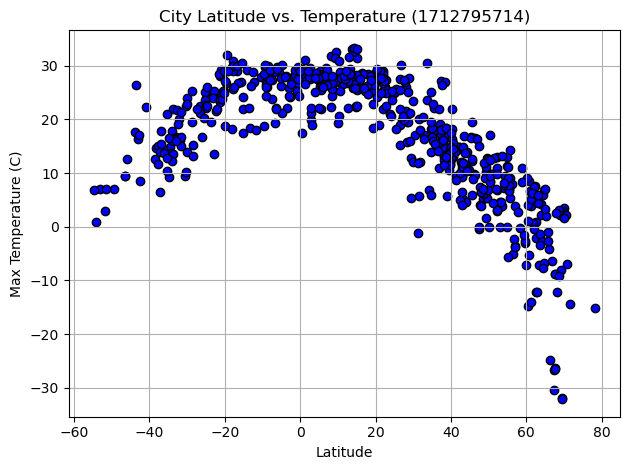

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors='k')
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = city_data_df["Date"].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

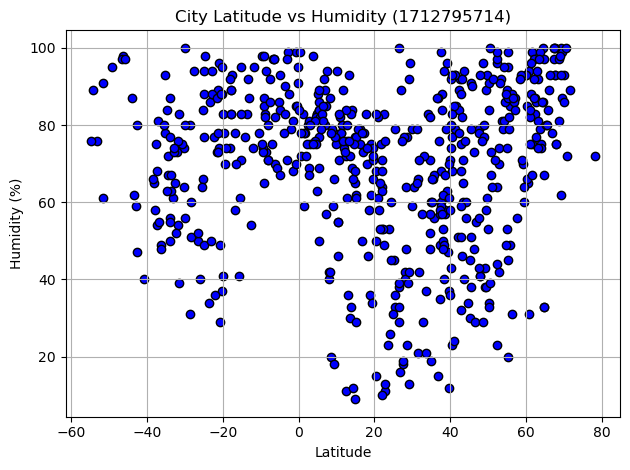

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="b", edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

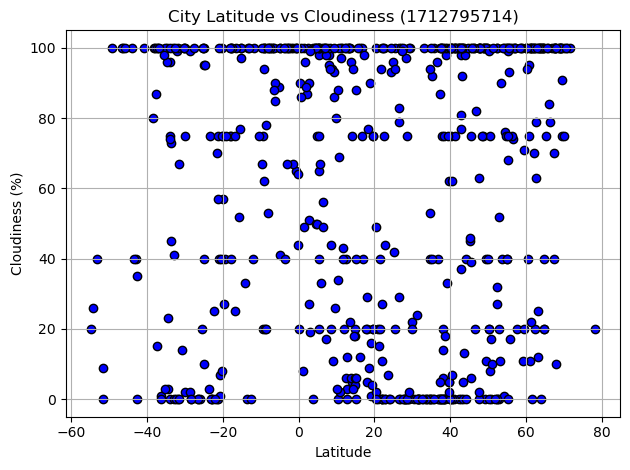

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

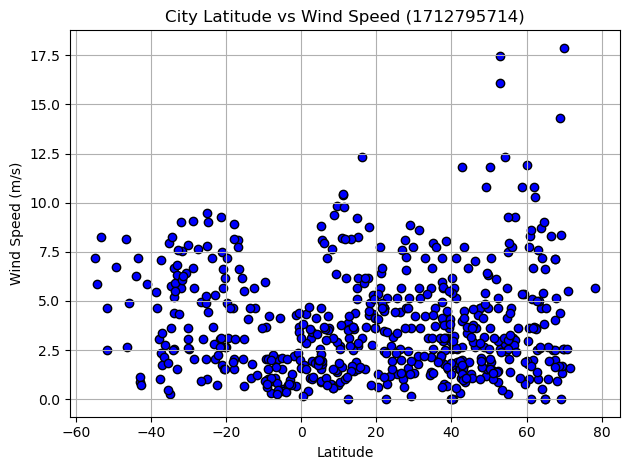

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, variable, hem):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress = x*slope + intercept
    line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.plot(x, regress, color="r")
    plt.title(f"Latitude vs. {variable} {hem} Line Regression Plot")
    plt.xlabel("Latitude")
    plt.ylabel(variable)
    print(f"{line}")
    print(f"The r-value is: {rvalue}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,trenton,40.2170,-74.7429,18.18,74,75,2.57,US,1712796376
2,howrah,22.5892,88.3103,26.00,83,75,0.00,IN,1712796071
4,jamestown,42.0970,-79.2353,14.80,51,100,1.54,US,1712796162
6,anna regina,7.2644,-58.5077,26.36,85,17,4.23,GY,1712796454
9,orange,33.7000,-117.7675,30.49,37,0,3.09,US,1712795831


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,17.68,87,100,6.26,NZ,1712796394
3,adamstown,-25.0660,-130.1015,22.19,88,100,9.48,PN,1712796393
5,tandil,-37.3217,-59.1332,6.49,68,15,2.36,AR,1712796055
7,west island,-12.1568,96.8225,26.99,74,40,4.63,CC,1712796455
8,grytviken,-54.2811,-36.5092,0.94,89,26,5.84,GS,1712796455


###  Temperature vs. Latitude Linear Regression Plot

y = -0.53x + 33.84
The r-value is: -0.8692820023470178


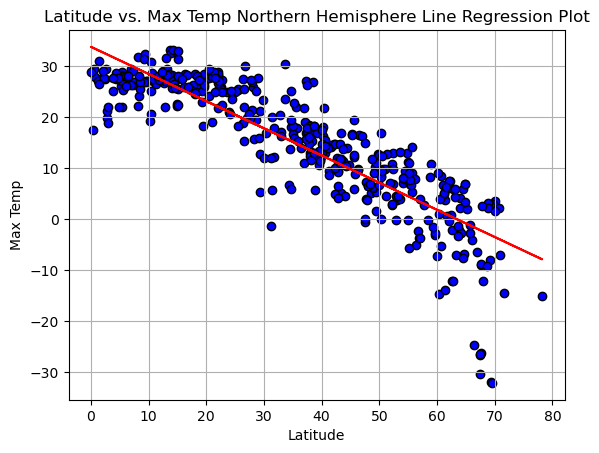

In [17]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
variable = "Max Temp"
hem = "Northern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig5.png")
plt.show()

y = 0.39x + 30.28
The r-value is: 0.781742107853101


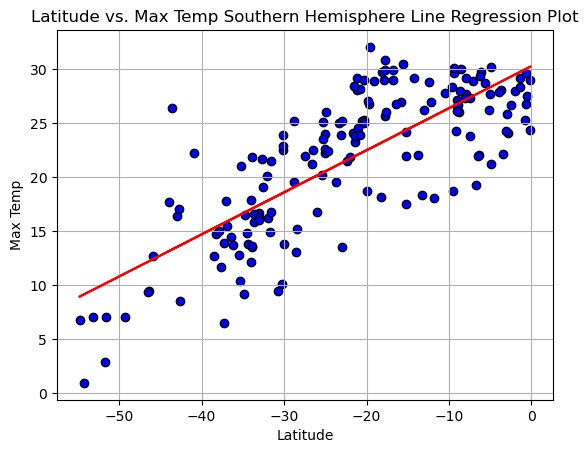

In [18]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
variable = "Max Temp"
hem = "Southern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** According to the Latitude vs. Max Temp graph for the northern hemisphere, the graph indicates a strong negative relation between latitude and max temperature in the northern hemisphere. The scatter plot is quite bundled up and all create a consistent strong linear regression. The second graph, Latitude vs. Max Temp Southern Hemisphere, shows a positive relationship between Latitude and the maximum temperature in the Southern Hemisphere. The linear regression line is positive as shown from the scatter plots as well. According to both linear regression lines with r-values close to 1 and -1, the closer the latitude is to 0, the higher the temperature of the cities. The lines show a extremely strong relation between the two variables.

### Humidity vs. Latitude Linear Regression Plot

y = 0.2x + 60.8
The r-value is: 0.17810388861578233


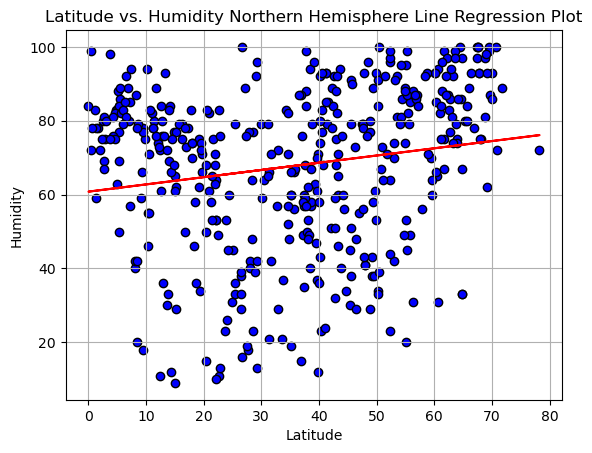

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
variable = "Humidity"
hem = "Northern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig7.png")
plt.show()

y = 0.32x + 81.88
The r-value is: 0.2630599184694698


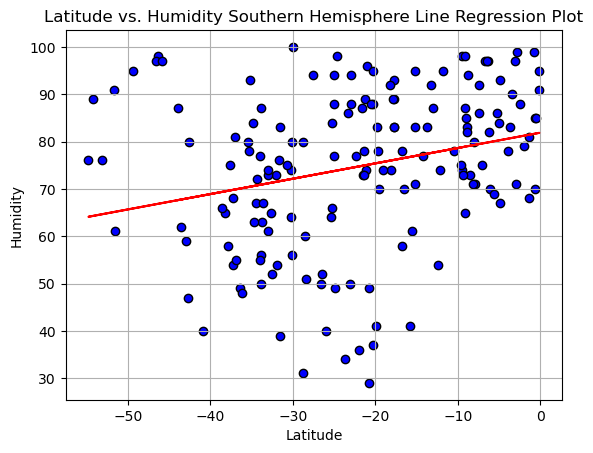

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
variable = "Humidity"
hem = "Southern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** From what can be seen on the graph, Latitude vs. Humidity Northern Hemisphere, the scatter plots are spread out throughout the grid. The linear regression line consists of an r-value of 0.183. From this graph, there is seemingly no relation between the latitude and humidity in the northern hemisphere. In the second graph, Latitude vs. Humidity Southern Hemisphere, the linear regression line has a r-value of 0.102. According to the scatter plots, majority of the cities have high humidity whether the latitude was high or low. Again, it seems to produce the result that there is no relation between humidity and latitude. An observation from the graph is that cities within the Southern Hemisphere tends to have high humidity.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.27x + 48.16
The r-value is: 0.13032725865779798


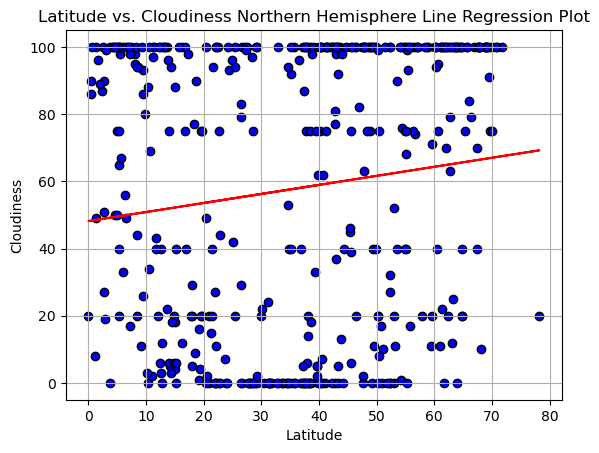

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
variable = "Cloudiness"
hem = "Northern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig9.png")
plt.show()

y = 0.71x + 78.87
The r-value is: 0.24753492357151535


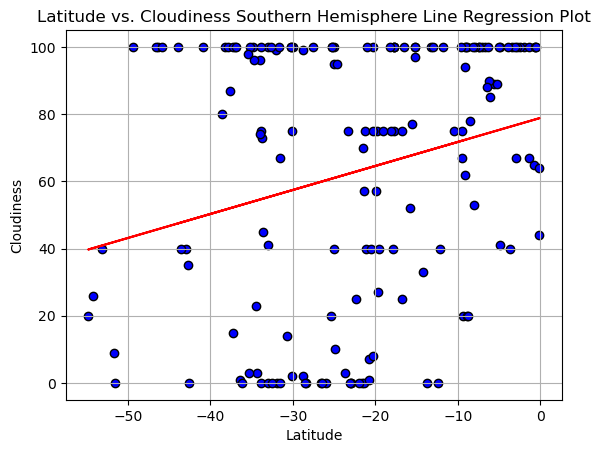

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
variable = "Cloudiness"
hem = "Southern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** From the Latitude vs. Cloudiness Northern Hemisphere graph, it shows a positive linear regression line, although not too strong. This is because majority of the data seems to populate towards a higher number of cloudiness, however the plots on the scatter plot seem to be quite spread out. There is a bundle of plots at the bottom of the graph too towards 0, hence balancing out the data so that the r-value is at 0.142. This data is consistent in the Southern Hemisphere graph as well. There seems to be a bundle of the plots at 100 cloudiness, however the data is balances as about half of the plots hover below 80 cloudiness, creating a linear regression line with the r-value of 0.019. From the two graphs, it can be concluded that there doesn't seem to be a relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 3.32
The r-value is: 0.09881414325625051


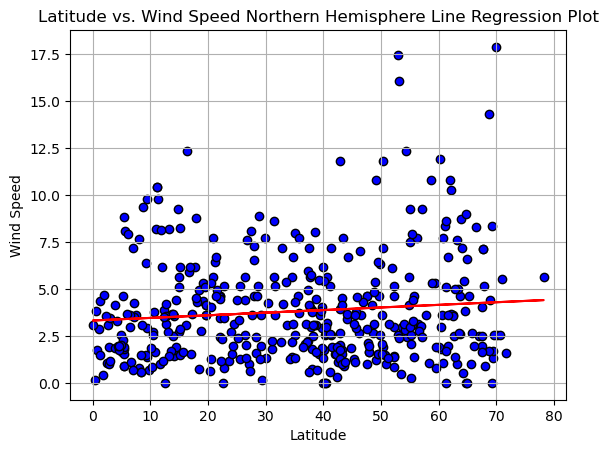

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
variable = "Wind Speed"
hem = "Northern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig11.png")
plt.show()

y = -0.08x + 2.06
The r-value is: -0.4099050708704523


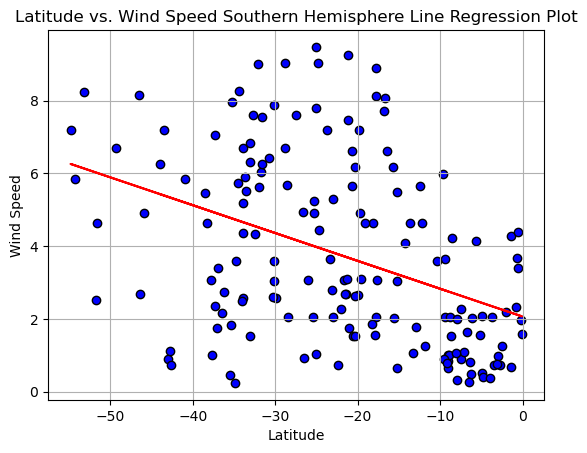

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="b", edgecolors="k")
plt.grid()
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
variable = "Wind Speed"
hem = "Southern Hemisphere"
linear_regression_plot(x, y, variable, hem)
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** From the two graphs Latitude vs. Wind Speed, the wind speeds are pretty consistent in both hemispheres with a group of cities below 6 m/s wind speed. However the data is quite spreadout as it does show a positive linear regression line in the northern hemisphere and a negative linear regression line in the southern hemisphere. This means wind speed does tend to get higher as the data strays from the latitude of 0. Although not greatly, the lines do support that conclusion.